In [84]:
import pandas as pd

FILE_PATH='acm.csv'


## Parse TXT file to CSV file

In [88]:
import csv


def yield_file_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

def process_entry(lines):
    entry = {}
    for line in lines:
        if line.startswith('#*'):
            entry['Title'] = line[2:].strip()
        elif line.startswith('#@'):
            entry['Authors'] = line[2:].strip()
        elif line.startswith('#t'):
            entry['Year'] = line[2:].strip()
        elif line.startswith('#c'):
            entry['Venue'] = line[2:].strip()
        elif line.startswith('#index'):
            entry['Index'] = line[6:].strip()
        elif line.startswith('#%'):
            references = entry.get('References', [])
            references.append(line[2:].strip())
            entry['References'] = references
    return entry


def process_large_file(input_path, output_path):
    current_lines = []

    with open(output_path, 'w', newline='') as csvfile:
        fieldnames = ['Title', 'Authors', 'Year', 'Venue', 'Index', 'References']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for line in yield_file_lines(input_path):
            if line.startswith('#*') and current_lines:
                entry = process_entry(current_lines)
                if 'References' in entry:
                    entry['References'] = ', '.join(entry['References'])
                writer.writerow(entry)
                current_lines = []

            current_lines.append(line)

        if current_lines:
            entry = process_entry(current_lines)
            if 'References' in entry:
                entry['References'] = ', '.join(entry['References'])
            writer.writerow(entry)

process_large_file('acm.txt', 'acm.csv')

In [ ]:

authors = set()
venues = set()
index = set()
references = set()

def authors_split(authors):
    result = []
    extend = False
    
    for author in authors.split(','):
        author = author.strip()

        if 'Jr.' in author:
            if not result:
                result.append('Jr.')
                extend = True
            else:
                result[-1] += ' Jr.'
        else:
            if extend:
                result[-1] += author
                extend = False
            else:
                result.append(author)
 
    return result

df = pd.read_csv(FILE_PATH, skiprows=0)

authors = [author for sublist in list(df['Authors'].dropna().map(authors_split)) for author in sublist]

print('number of unique authors: ', len(set(authors)))

venues = set(df['Venue'].dropna())

print('number of unique venues: ', len(venues))

index = set(df['Index'].dropna())

print('number of unique index: ', len(index))


references = set([reference for sublist in list(df['References'].dropna().map(lambda x: x.split(','))) for reference in sublist])

print('number of unique references: ', len(references))


number of unique authors:  1652801
number of unique venues:  273328
number of unique index:  2385013
number of unique references:  1181415


In [108]:

filtered_df = df[df['Title'].str.contains('Principles and Practice of Knowledge Discovery in Databases', na=False, case=False)]

venues = filtered_df['Venue'].dropna().unique()

for venue in venues:
    print(venue + '\n')



PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases



## Since one conference has multiple different venue names, which indiacates the numbers of unique publications are not accurate.


## The venues have slightly different names 

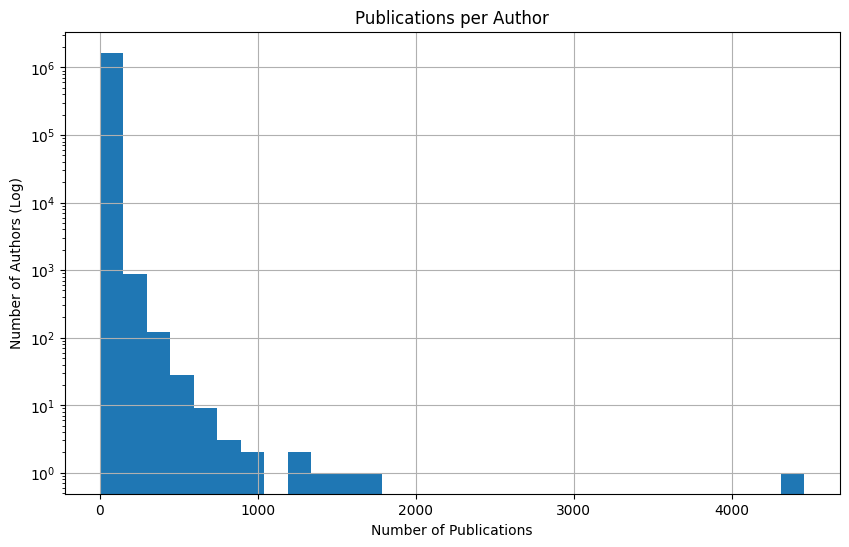

In [109]:
import matplotlib.pyplot as plt


def plot_histogram_number_of_publications_per_authors():
    df = pd.read_csv(FILE_PATH)
    
    authors_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['Authors']) and pd.notna(row['Title']):
            authors = authors_split(row['Authors'])
            title = row['Title']
            for author in authors:
                author = author.strip()
                if author in authors_map:
                    authors_map[author].append(title)
                else:
                    authors_map[author] = [title]

    publication_counts = [len(publications) for publications in authors_map.values()]

    plt.figure(figsize=(10, 6))
    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Number of Publications')
    plt.ylabel('Number of Authors (Log)')
    plt.title('Publications per Author')
    plt.grid(True)
    plt.show()

    return publication_counts


publication_counts = plot_histogram_number_of_publications_per_authors()

# authors = '_ ,_ ,_'
# authors = '_ ,_'

In [ ]:
import numpy as np

print("Mean -",np.mean(publication_counts))
print("Standard Deviation -",np.std(publication_counts))
print("Q1 - ",np.percentile(publication_counts,25))
print("Median - ",np.percentile(publication_counts,50))
print("Q3 - ",np.percentile(publication_counts,75))

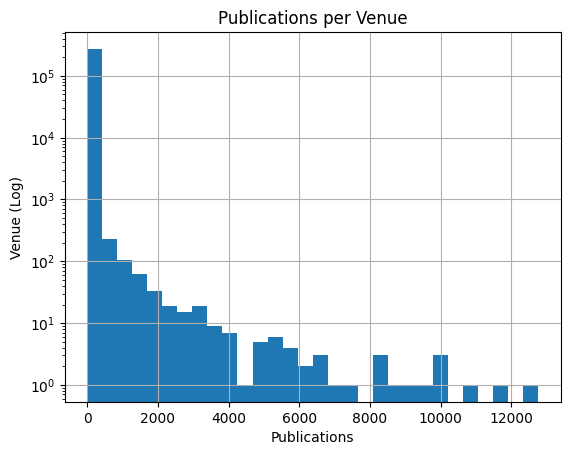

Venue with most publications: IEEE Transactions on Information Theory


In [110]:

def plot_histogram_number_of_publications_per_venue():
    df = pd.read_csv(FILE_PATH)
    
    venue_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['Title']):
            venue = row['Venue']

            venue_map[venue] = venue_map.get(venue, 0) + 1

    publication_counts = list(venue_map.values())
    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Publications')
    plt.ylabel('Venue (Log)')
    plt.title('Publications per Venue')
    plt.grid(True)
    plt.show()

    print('Venue with most publications:', max(venue_map, key=venue_map.get))
    
    return publication_counts

publication_counts = plot_histogram_number_of_publications_per_venue()

In [ ]:
import numpy as np
print("Mean -", np.mean(publication_counts))
print("Standard Deviation -", np.std(publication_counts))
print("Q1 - ", np.percentile(publication_counts,25))
print("Median - ", np.percentile(publication_counts,50))
print("Q3 - ", np.percentile(publication_counts,75))

IEEE Transactions on Information Theory is the venue with the most publications


# Question F

max_citation_count and max_citation_index:  809 2015217


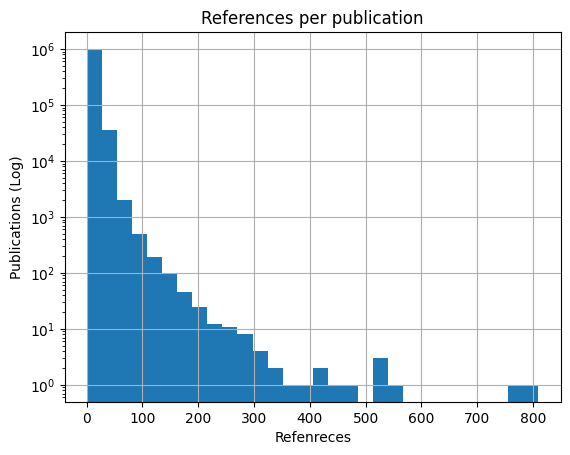

In [107]:

def plot_histogram_number_of_references_per_publication():
    df = pd.read_csv(FILE_PATH)
    
    references_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']):
            references = row['References']
            index = row['Index']
            
            number_of_references = len(references.split(','))
            
            references_map[index] = references_map.get(index, 0) + number_of_references
            
    max_citation_index = max(references_map, key=references_map.get)
    max_citation_count = references_map[max_citation_index]

    print('max_citation_count and max_citation_index: ', max_citation_count, max_citation_index)
    publication_counts = list(references_map.values())

    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Refenreces')
    plt.ylabel('Publications (Log)')
    plt.title('References per publication')
    plt.grid(True)
    plt.show()

    return publication_counts

publication_counts = plot_histogram_number_of_references_per_publication()

# proceeding of the 24th acm simposium on operating systems principles


# Question F

max_citation_count and max_citation_index:  938039 2135000


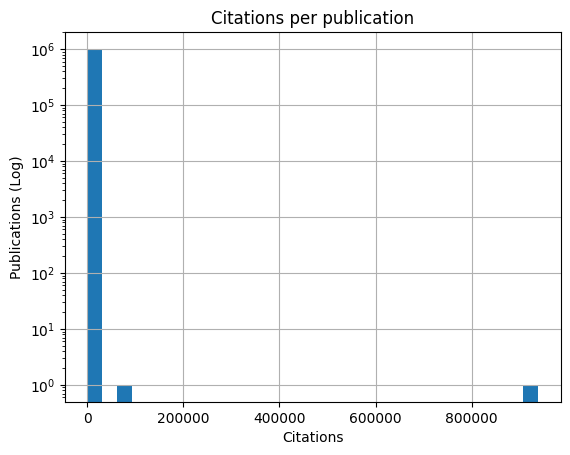

In [115]:

citations_map = {}

def plot_histogram_number_of_citations_per_publication():
    df = pd.read_csv(FILE_PATH)
    
    

    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']):
            references = row['References'].strip().split(',')

            for reference in references:
                reference = reference.strip()

                citations_map[reference] = citations_map.get(reference, 0) + 1


    max_citation_index = max(citations_map, key=citations_map.get)
    max_citation_count = citations_map[max_citation_index]

    print('max_citation_count and max_citation_index: ', max_citation_count, max_citation_index)
    
    publication_counts = list(citations_map.values())

    plt.hist(list(citations_map.values()), bins=30, log=True)
    plt.xlabel('Citations')
    plt.ylabel('Publications (Log)')
    plt.title('Citations per publication')
    plt.grid(True)
    plt.show()

    return publication_counts

#inform jounel of computing

publication_counts = plot_histogram_number_of_citations_per_publication()

In [116]:
print("Mean -", np.mean(publication_counts))
print("Standard Deviation -", np.std(publication_counts))
print("Q1 - ", np.percentile(publication_counts,25))
print("Median - ", np.percentile(publication_counts,50))
print("Q3 - ", np.percentile(publication_counts,75))

Mean - 9.59994143891533
Standard Deviation - 938.7795489910166
Q1 -  1.0
Median -  3.0
Q3 -  7.0


In [129]:
print(citations_map['194'])
print(citations_map.get('194', 0 ))

1
1


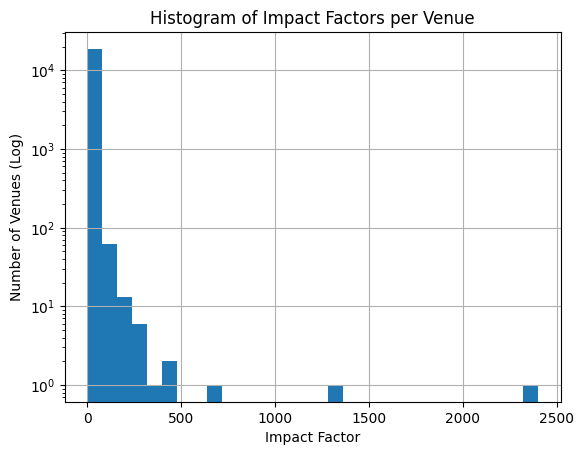

Venue with highest impact factor: Introduction to Algorithms, Impact Factor: 2401.0


In [ ]:

venue_citations = {}
venue_publications = {}

def calculate_and_plot_impact_factor(file_path):
    df = pd.read_csv(file_path)
    


    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['References']) and pd.notna(row['Index']):
            index = str(int(row['Index']))
            venue = row['Venue']
            venue_citations[venue] = venue_citations.get(venue, 0) + citations_map.get(index, 0)

            venue_publications[venue] = venue_publications.get(venue, 0) + 1

    impact_factors = {
        venue: citations / venue_publications[venue]
        for venue, citations in venue_citations.items()
    }

    impact_factor_values = list(impact_factors.values())

    plt.hist(impact_factor_values, bins=30, log=True)
    plt.xlabel('Impact Factor')
    plt.ylabel('Number of Venues (Log)')
    plt.title('Histogram of Impact Factors per Venue')
    plt.grid(True)
    plt.show()

    return impact_factors

impact_factors = calculate_and_plot_impact_factor(FILE_PATH)

max_impact_venue = max(impact_factors, key=impact_factors.get)
print(f"Venue with highest impact factor: {max_impact_venue}, Impact Factor: {impact_factors[max_impact_venue]}")


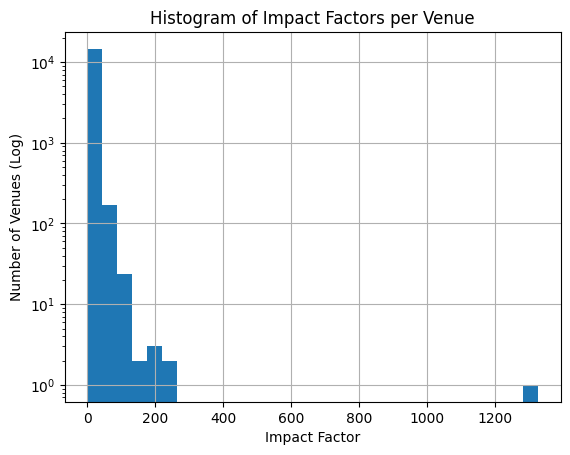

Venue with highest impact factor: INFORMS Journal on Computing, Impact Factor: 1326.7245762711864


In [132]:
venue_citations = {}
venue_publications = {}

def calculate_and_plot_impact_factor(file_path):
    df = pd.read_csv(file_path)
    

    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['References']) and pd.notna(row['Index']):
            index = str(int(row['Index']))
            venue = row['Venue']

            venue_citations[venue] = venue_citations.get(venue, 0) + citations_map.get(index, 0)

            venue_publications[venue] = venue_publications.get(venue, 0) + 1

    impact_factors = {
        venue: citations / venue_publications[venue]
        for venue, citations in venue_citations.items() if venue_publications[venue] >= 10
    }

    impact_factor_values = list(impact_factors.values())

    plt.hist(impact_factor_values, bins=30, log=True)
    plt.xlabel('Impact Factor')
    plt.ylabel('Number of Venues (Log)')
    plt.title('Histogram of Impact Factors per Venue')
    plt.grid(True)
    plt.show()

    return impact_factors

impact_factors = calculate_and_plot_impact_factor(FILE_PATH)

max_impact_venue = max(impact_factors, key=impact_factors.get)
print(f"Venue with highest impact factor: {max_impact_venue}, Impact Factor: {impact_factors[max_impact_venue]}")


In [111]:
index_year_map = {}
index_publication_map = {}
for i, row in df.iterrows():
    if pd.notna(row['Index']) and pd.notna(row['Year']):
        year = str(int(row['Year'])).strip()
        index = str(row['Index']).strip()
        index_year_map[index] = year
        index_publication_map[index] = row['Title']


In [113]:
print(index_year_map['2015217'])
min_year = min(index_year_map.values())
max_year = max(index_year_map.values())
print(min_year, max_year)
print(index_publication_map['2135000'])

2013
1936 2016
INFORMS Journal on Computing


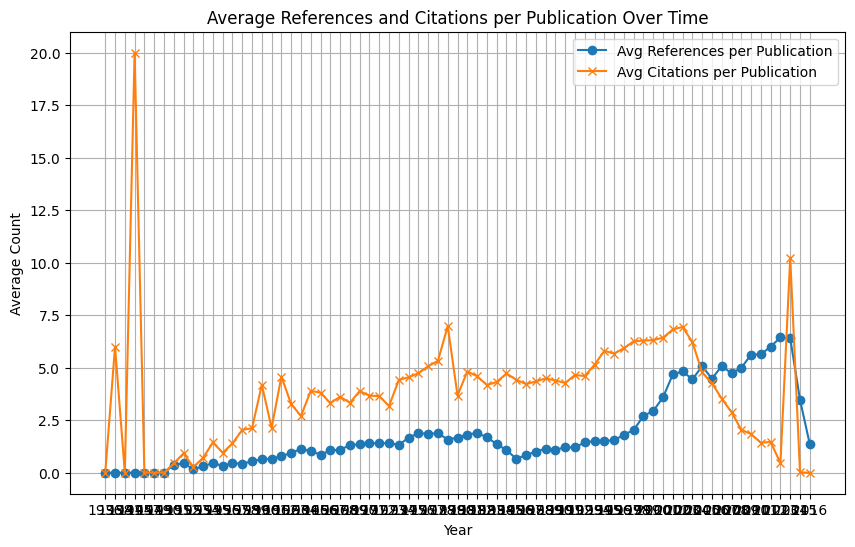

In [103]:

import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH = 'acm.csv'

def plot_average_references_and_citations_per_publication_per_year():
    df = pd.read_csv(FILE_PATH)

    year_publication_map = {}

    for year in range(int(min_year), int(max_year) + 1):
        year = str(year)
        year_publication_map[year] = {
            'references': 0,
            'publications': 0,
            'citations': 0
        }

    for i, row in df.iterrows():
           
        if pd.notna(row['Index']) and pd.notna(row['Year']):
            year = str(int(row['Year']))
            year_publication_map[year]['publications'] += 1

        if pd.notna(row['References']) and pd.notna(row['Index']) and pd.notna(row['Year']):

            references = row['References'].strip().split(',')
            year = str(int(row['Year']))
            
            year_publication_map[year]['references'] += len(references)

        if pd.notna(row['Index']) and pd.notna(row['References']):

            references = row['References'].strip().split(',')

            for reference in references:
                reference = reference.strip()
                
                if reference in index_year_map:
                    year_publication_map[index_year_map[reference]]['citations'] += 1       
                    

    ## if certain years have no publications, we need to remove them
    years_to_remove = []
    for year, data in year_publication_map.items():
        if data['publications'] == 0:
            years_to_remove.append(year)
    
    for year in years_to_remove:
        del year_publication_map[year]

    years = []
    avg_references = []
    avg_citations = [] 

    for year, data in sorted(year_publication_map.items()):
        years.append(year)
        avg_references.append(data['references'] / data['publications'])
        avg_citations.append(data['citations'] / data['publications'])

    plt.figure(figsize=(10, 6))
    plt.plot(years, avg_references, marker='o', label='Avg References per Publication')
    plt.plot(years, avg_citations, marker='x', label='Avg Citations per Publication')
    plt.xlabel('Year')
    plt.ylabel('Average Count')
    plt.title('Average References and Citations per Publication Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_references_and_citations_per_publication_per_year()

